In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno

In [2]:
df = pd.read_csv("Bangalore_1990_2022_BangaloreCity.csv")

In [3]:
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11824 non-null  float64
 2   tmin    10505 non-null  float64
 3   tmax    11265 non-null  float64
 4   prcp    7274 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


# **Exploratory Data Analysis (EDA)**

## **Step 1:** Data Cleaning and Data Preperation

#### Date Parsing and Indexing

- Converted the `time` column to **datetime format** using the specified format `"%d-%m-%Y"` and stored it in a new column `date`.
- Set the original `time` column as the **DataFrame index** for time-series operations.
- Dropped the original `time` column after setting it as the index (⚠️ Note: Do **not** rerun this cell as the `time` column is removed).

In [5]:
df['date'] = pd.to_datetime(df["time"],format = "%d-%m-%Y")
df.set_index(df["time"],inplace = True)
df.drop(columns="time",inplace=True) #Don't rerun this code
df.head()

,tavg,tmin,tmax,prcp,date
time,,,,,
01-01-1990,22.9,19.1,28.4,NaN,1990-01-01
02-01-1990,21.7,NaN,26.5,0.0,1990-01-02
03-01-1990,21.0,16.4,26.5,0.0,1990-01-03
04-01-1990,20.8,NaN,27.4,0.0,1990-01-04
05-01-1990,20.4,14.2,26.1,0.0,1990-01-05


In [6]:
df.head()

,tavg,tmin,tmax,prcp,date
time,,,,,
01-01-1990,22.9,19.1,28.4,NaN,1990-01-01
02-01-1990,21.7,NaN,26.5,0.0,1990-01-02
03-01-1990,21.0,16.4,26.5,0.0,1990-01-03
04-01-1990,20.8,NaN,27.4,0.0,1990-01-04
05-01-1990,20.4,14.2,26.1,0.0,1990-01-05


### **Handling Missing Values**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11894 entries, 01-01-1990 to 25-07-2022
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   tavg    11824 non-null  float64       
 1   tmin    10505 non-null  float64       
 2   tmax    11265 non-null  float64       
 3   prcp    7274 non-null   float64       
 4   date    11894 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 557.5+ KB


##### Checking the null values

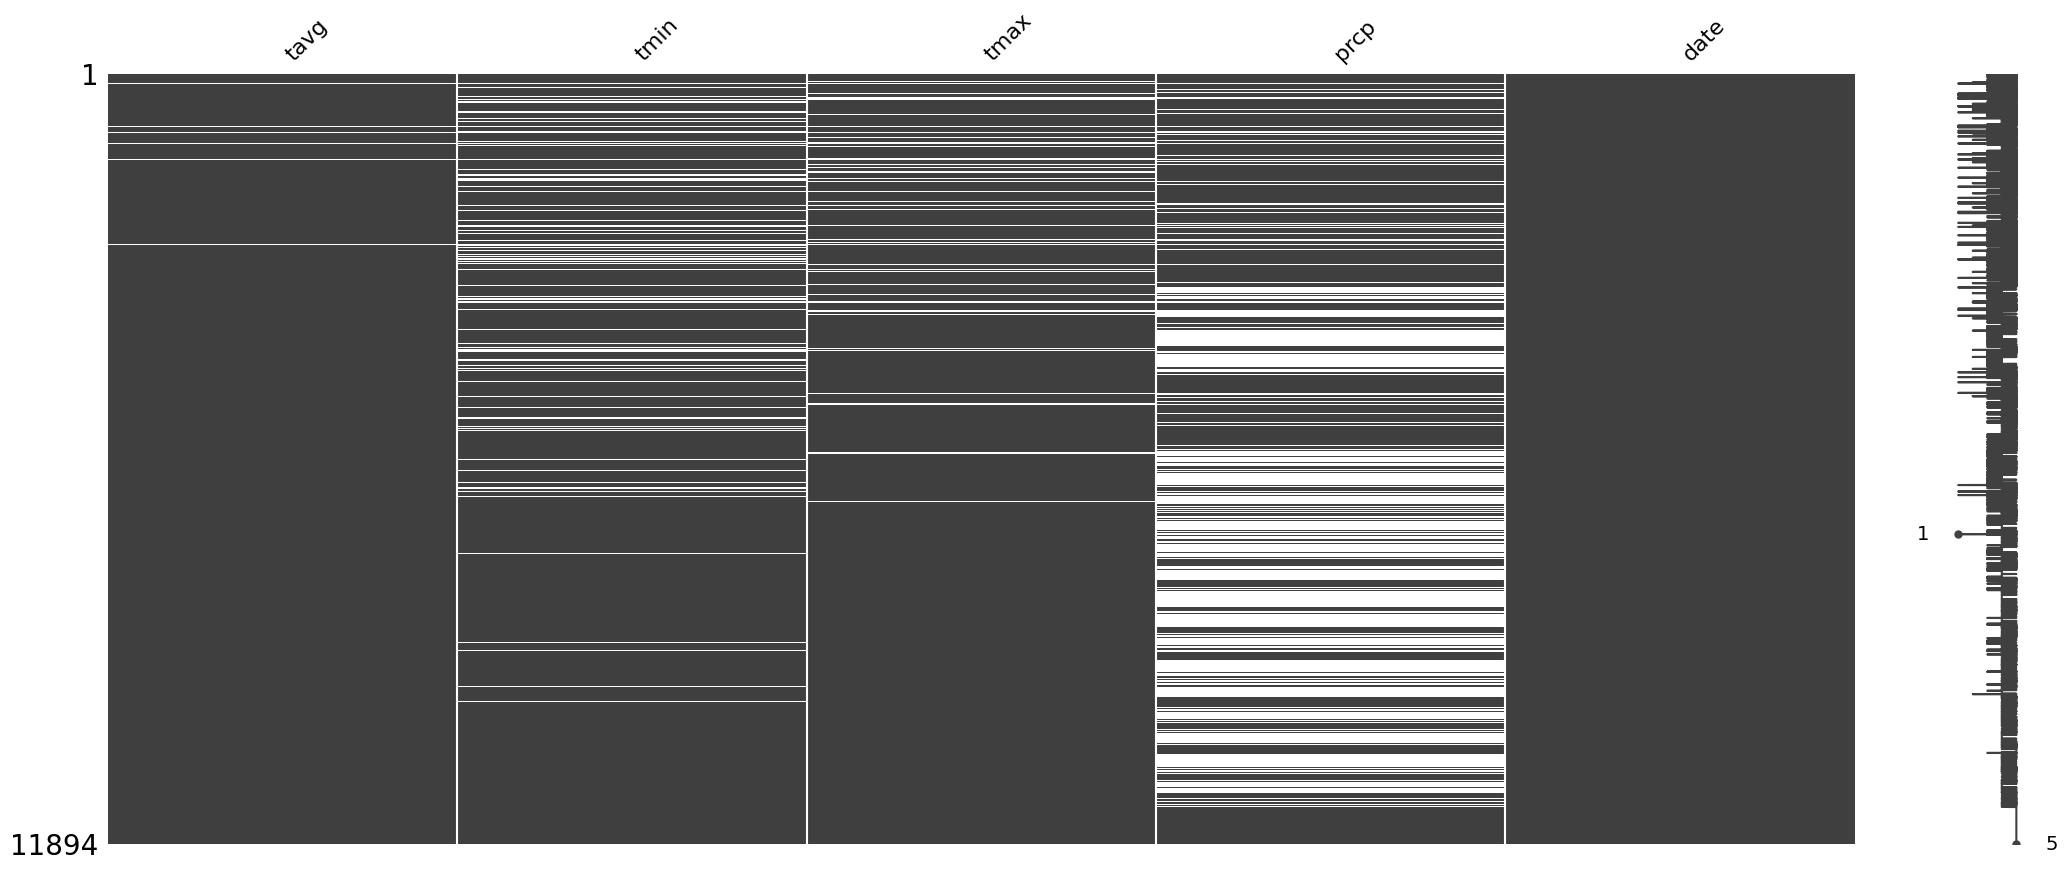

In [8]:
msno.matrix(df)
plt.show()

#### **Missing Value Imputation**

- Replaced missing values in `tavg`, `tmin`, and `tmax` columns using **Forward Fill (`ffill`)** method, assuming temperature readings are continuous over time and closely related.
- Replaced missing values in `prcp` column with **0.0**, as missing entries indicate days with **no recorded rainfall**.


In [9]:
temp_cols = ['tavg', 'tmin', 'tmax']
df[temp_cols] = df[temp_cols].fillna(method='ffill')
df['prcp'].fillna(0.0, inplace=True)
df.head()

,tavg,tmin,tmax,prcp,date
time,,,,,
01-01-1990,22.9,19.1,28.4,0.0,1990-01-01
02-01-1990,21.7,19.1,26.5,0.0,1990-01-02
03-01-1990,21.0,16.4,26.5,0.0,1990-01-03
04-01-1990,20.8,16.4,27.4,0.0,1990-01-04
05-01-1990,20.4,14.2,26.1,0.0,1990-01-05


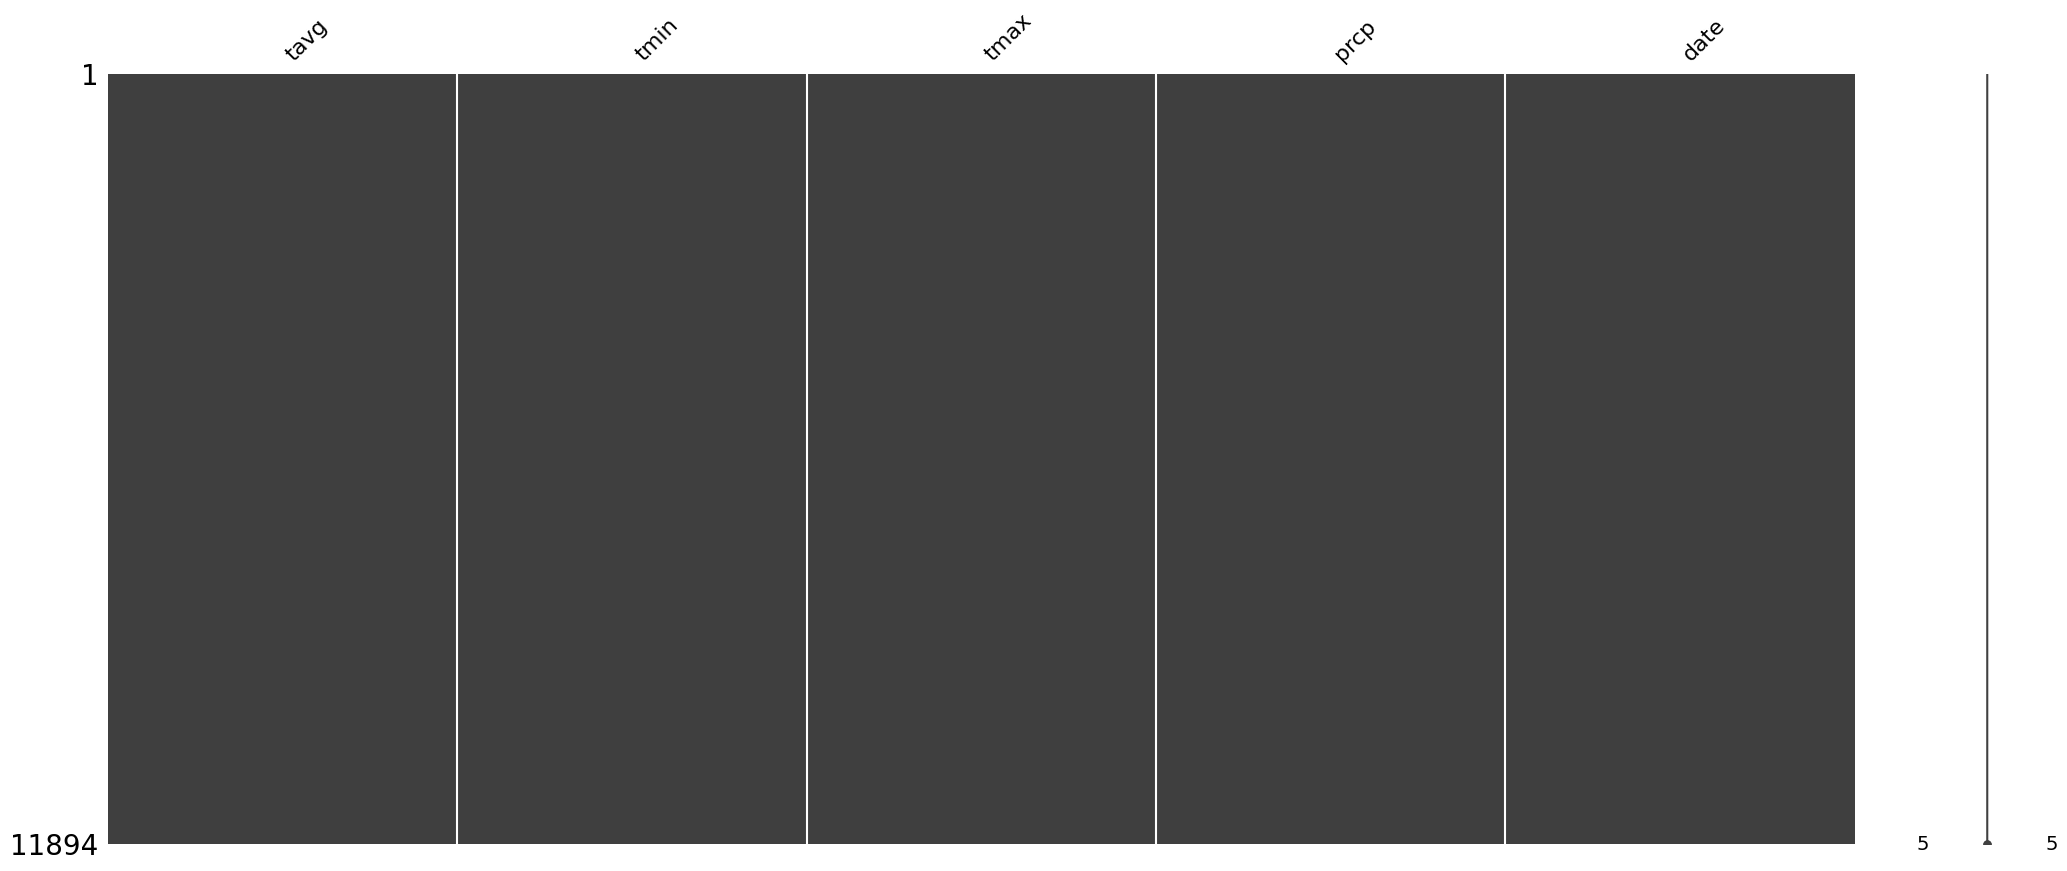

In [10]:
msno.matrix(df)
plt.show()

In [11]:
df.isna().sum() 

tavg    0
tmin    0
tmax    0
prcp    0
date    0
dtype: int64

In [12]:
df.sample()

,tavg,tmin,tmax,prcp,date
time,,,,,
07-10-1996,23.9,18.2,30.1,0.0,1996-10-07


#### Date Features Extraction

- Extracted **year**, **month**, and **day** from the datetime index of the DataFrame.
- These features are useful for time-based grouping, analysis, and seasonal trend identification.

In [13]:
df["year"] = pd.DatetimeIndex(df.index).year
df["month"]= pd.DatetimeIndex(df.index).month
df["day"]=pd.DatetimeIndex(df.index).day
df.head() 

,tavg,tmin,tmax,prcp,date,year,month,day
time,,,,,,,,
01-01-1990,22.9,19.1,28.4,0.0,1990-01-01,1990,1,1
02-01-1990,21.7,19.1,26.5,0.0,1990-01-02,1990,2,1
03-01-1990,21.0,16.4,26.5,0.0,1990-01-03,1990,3,1
04-01-1990,20.8,16.4,27.4,0.0,1990-01-04,1990,4,1
05-01-1990,20.4,14.2,26.1,0.0,1990-01-05,1990,5,1


#### Dropping the data of the year 2022, as it is incomplete.

In [14]:
df["year"].value_counts()

year
1992    366
2016    366
1996    366
2004    366
2000    366
2012    366
2020    366
2008    366
1990    365
1998    365
1997    365
2001    365
1999    365
1994    365
1995    365
1993    365
1991    365
2006    365
2005    365
2003    365
2002    365
2010    365
2011    365
2009    365
2007    365
2014    365
2013    365
2017    365
2015    365
2018    365
2019    365
2021    365
2022    206
Name: count, dtype: int64

In [15]:
df = df[df["year"]!=2022]
df.head()

,tavg,tmin,tmax,prcp,date,year,month,day
time,,,,,,,,
01-01-1990,22.9,19.1,28.4,0.0,1990-01-01,1990,1,1
02-01-1990,21.7,19.1,26.5,0.0,1990-01-02,1990,2,1
03-01-1990,21.0,16.4,26.5,0.0,1990-01-03,1990,3,1
04-01-1990,20.8,16.4,27.4,0.0,1990-01-04,1990,4,1
05-01-1990,20.4,14.2,26.1,0.0,1990-01-05,1990,5,1


### **Data Analysis**

#### Finding Hottest and Coldest Years

In [16]:
df.groupby("year")["tavg"].mean().sort_values(ascending = False).head()

year
2019    24.480548
2016    24.436339
2017    24.306849
1998    24.228493
2003    24.215890
Name: tavg, dtype: float64

> #### The year **`2019`** was the hottest year of Bangalore with average temperature of **`24.48°C`**

---

In [17]:
df.groupby(["year","month"])["tavg"].mean().sort_values(ascending=False).head()

year  month
2016  4        27.883333
      3        26.851613
2014  4        26.836667
2002  4        26.823333
2019  4        26.676667
Name: tavg, dtype: float64

> #### **`April 2016`** was the hottest month of Bangalore with average temperature of **`29.64°C`**

---

In [18]:
df.groupby(["year","month","day"])["tmax"].max().sort_values(ascending=False).head()

year  month  day
2016  4      25     39.2
1994  10     25     38.5
1999  3      29     38.4
1995  9      5      38.3
2003  2      6      38.1
Name: tmax, dtype: float64

> #### **`25th April 2016`**, was the hottest day of Bangalore with maximum temperature of **`39.2°C`**

In [19]:
df.groupby("year")["tavg"].mean().sort_values().head()

year
1992    23.268852
2004    23.395628
1994    23.438082
2000    23.447268
2011    23.507397
Name: tavg, dtype: float64

> #### **`1992`** was the coolest year of Bangalore with the average temperature of **`23.22 °C`**

In [20]:
df.groupby(["year","month"])["tavg"].mean().sort_values().head()

year  month
1996  12       21.074194
1992  12       21.080645
2021  12       21.203226
1993  12       21.300000
1999  12       21.364516
Name: tavg, dtype: float64

> #### **`January 1992`**, was the coolest month of Bangalore with average temperature of **`19.80°C`**

In [21]:
df.groupby(["year","month","day"])["tmin"].min().sort_values().head()

year  month  day
1992  8      15      9.3
             16      9.3
             17      9.3
             1      10.0
2011  4      3      10.2
Name: tmin, dtype: float64

> #### **`8th Aug 1992`**, was the coolest day of Bangalore with minimum  record temperature of **`9.3°C`**

In [22]:
df.groupby(["year"])["prcp"].mean().sort_values()

year
2002    1.568767
2012    1.604372
2006    1.608767
2003    1.721096
1999    1.814521
1990    1.827397
1992    1.959016
2016    2.027596
1994    2.111233
2001    2.165479
1993    2.250411
2010    2.288767
2019    2.462466
1996    2.480874
2011    2.531233
2018    2.564384
1995    2.604110
2009    2.610959
2004    2.803825
2000    2.831148
2013    2.863562
2014    2.948219
1997    2.954795
1991    3.012055
2015    3.116164
2020    3.210929
2008    3.235519
1998    3.320000
2007    4.015068
2005    4.169315
2021    4.376164
2017    4.639452
Name: prcp, dtype: float64

> #### The year **`2003`** had the lowest and **`2007`** had the highest rainfall in Bangalore

In [23]:
df.groupby(["year","month"])["prcp"].mean().sort_values(ascending=False).head()

year  month
2007  7        17.096774
2005  10       13.338710
2017  8        13.180645
2014  9        12.606667
1998  7        11.438710
Name: prcp, dtype: float64

> #### **`April 2011`**, recorded the highest average rainfall in Bangalore.

---

In [24]:
df.groupby(["year","month","day"])["prcp"].mean().sort_values(ascending=False).head()

year  month  day
2007  7      13     271.3
1991  11     16     255.0
1990  4      27     182.1
1997  1      10     179.1
1994  9      13     162.1
Name: prcp, dtype: float64

> #### **`13th July 2007`**, recorded the highest rainfall in Bangalore.

---

## **Data Visualization**

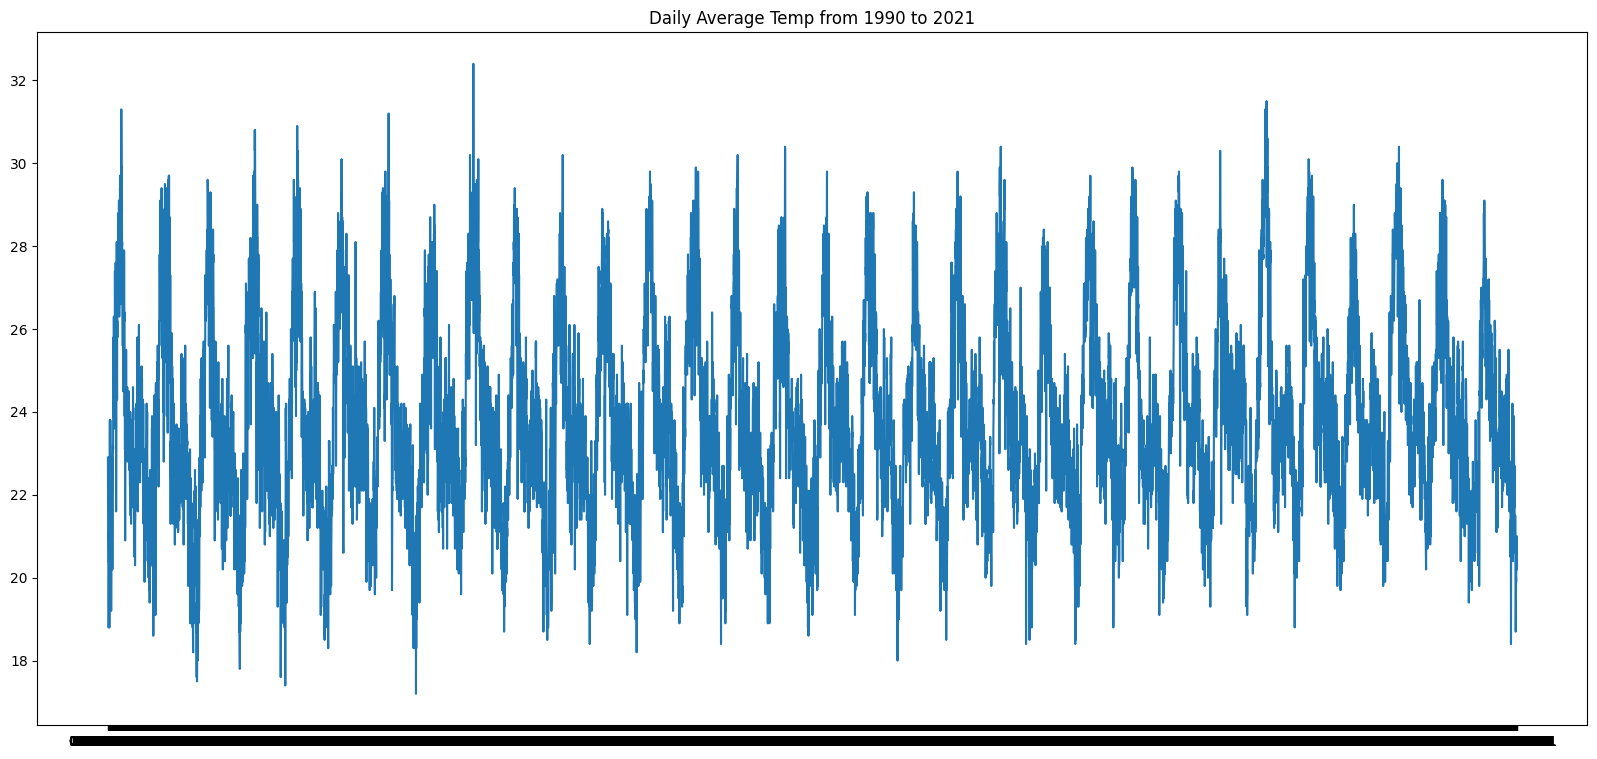

In [25]:
plt.figure(figsize=(20,9))
plt.plot(df["tavg"])
plt.title("Daily Average Temp from 1990 to 2021")
plt.show() 

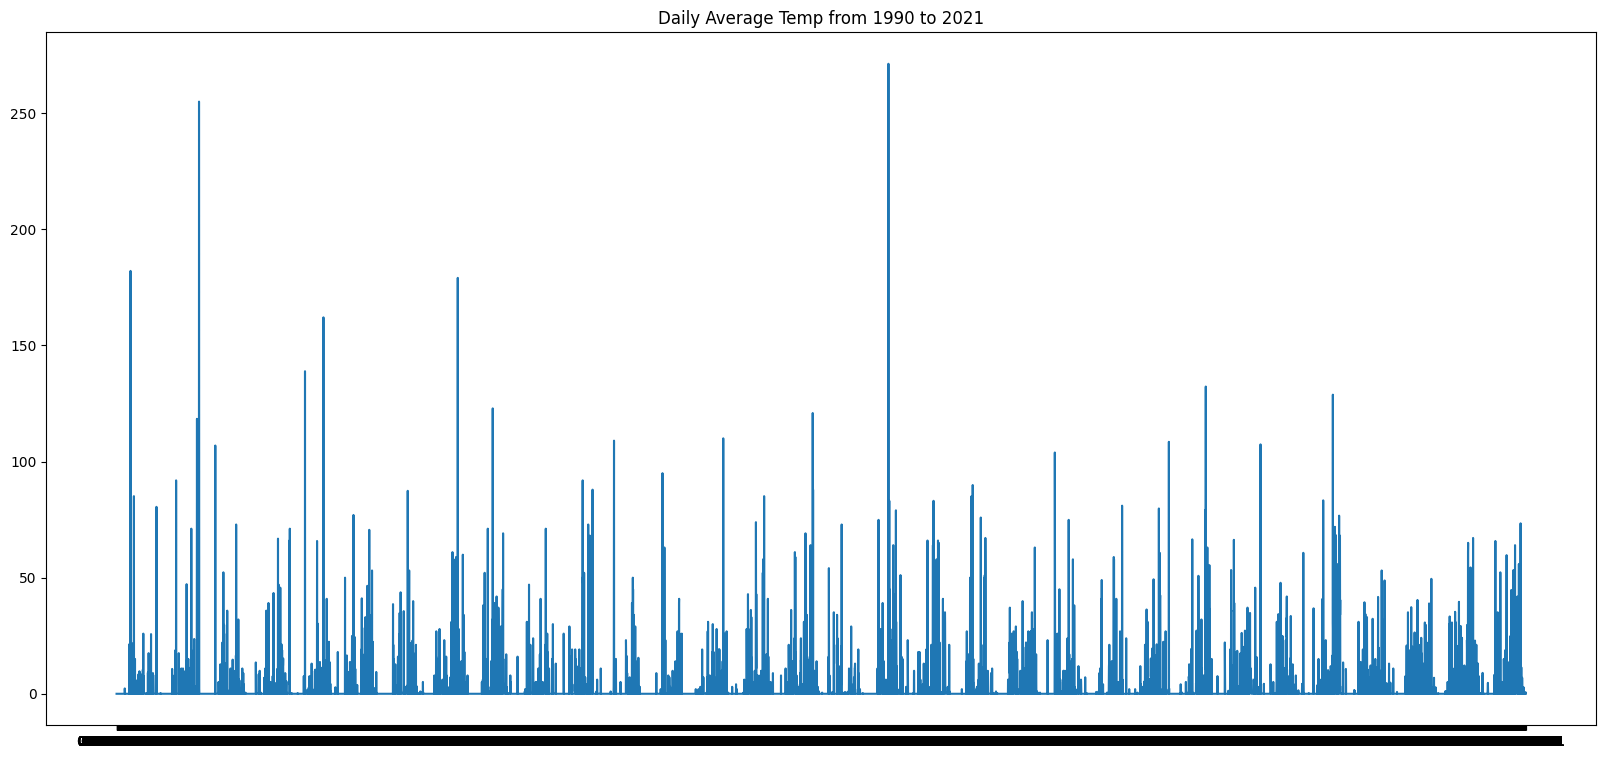

In [26]:
plt.figure(figsize=(20,9))
plt.plot(df["prcp"])
plt.title("Daily Average Temp from 1990 to 2021")
plt.show() 

##### Observation
- Data looks compressed so I will make a new dataframe with mean values yearwise.

In [27]:
yearwise = df.groupby("year")[["tavg","prcp"]].mean()
yearwise.head()

,tavg,prcp
year,,
1990,23.653151,1.827397
1991,23.610959,3.012055
1992,23.268852,1.959016
1993,23.646301,2.250411
1994,23.438082,2.111233


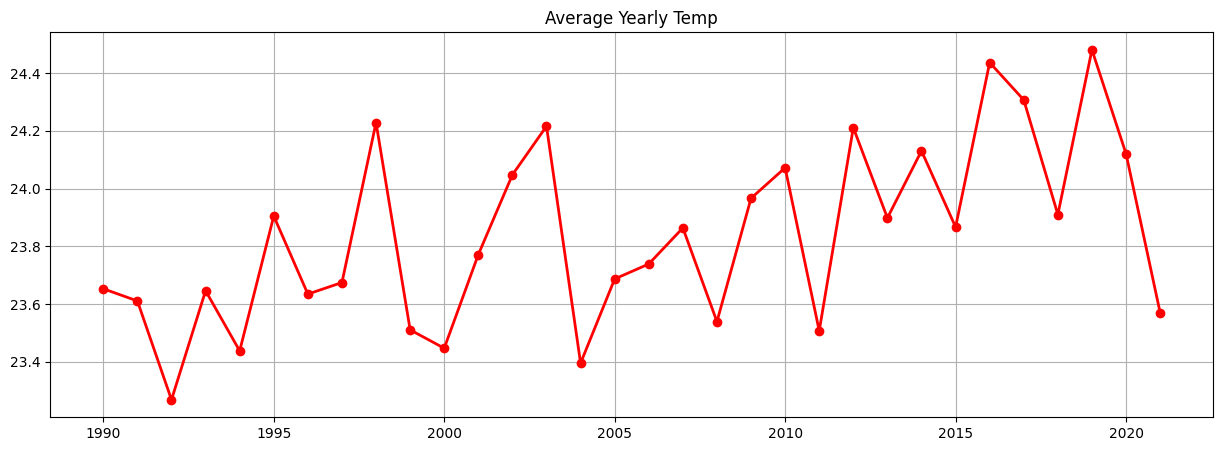

In [28]:
plt.figure(figsize=(15,5))
plt.plot(yearwise.index,yearwise["tavg"],marker="o",color="red",linewidth=2)
plt.title("Average Yearly Temp")
plt.grid()
plt.show()

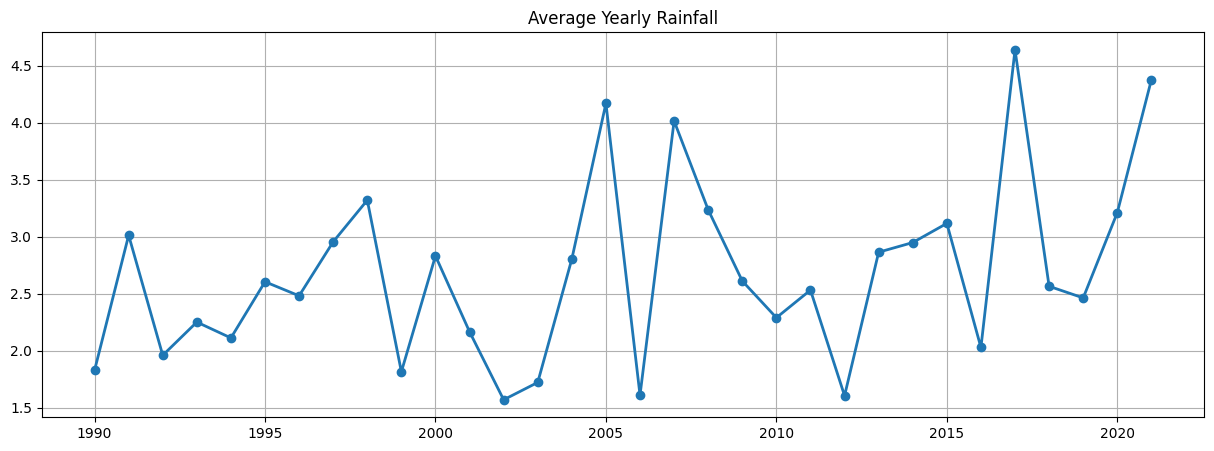

In [29]:
plt.figure(figsize=(15,5))
plt.plot(yearwise.index,yearwise["prcp"],marker="o",linewidth=2)
plt.title("Average Yearly Rainfall")
plt.grid()
plt.show()

----

In [30]:
months = df.groupby("month")[["tavg","prcp"]].mean()
months.head()

,tavg,prcp
month,,
1,22.580242,1.494859
2,24.164823,1.207080
3,25.709778,0.990827
4,25.973854,3.043333
5,25.250403,3.569254


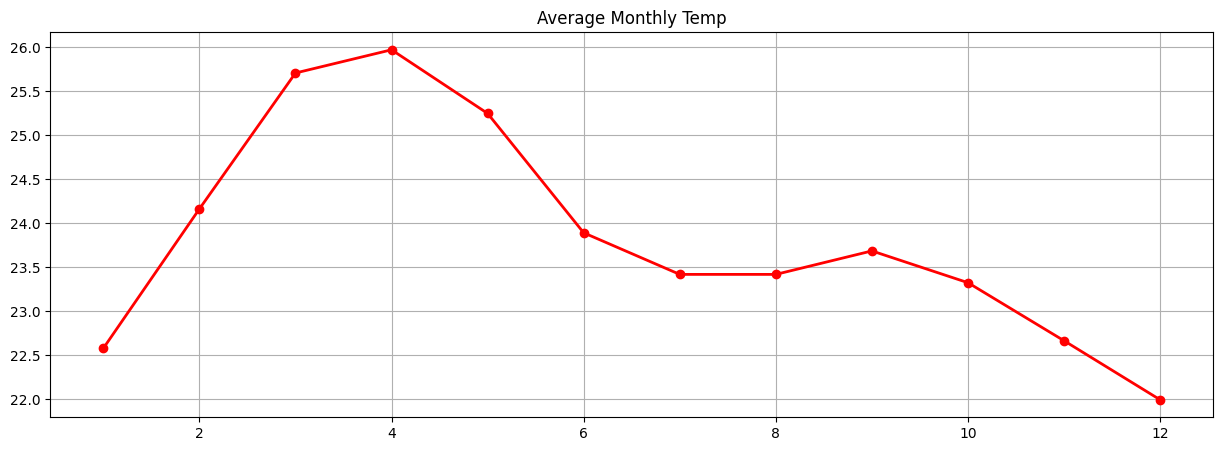

In [31]:
plt.figure(figsize=(15,5))
plt.plot(months.index,months["tavg"],marker="o",color="red",linewidth=2)
plt.title("Average Monthly Temp")
plt.grid()
plt.show()

#### Observations
- The temperature in Bangalore starts rising from the month of march and it increases till the month of May.
- We can also see a sudden spike of temperature in the month of September. So, we can verify that the term **September Heat** actually exists.

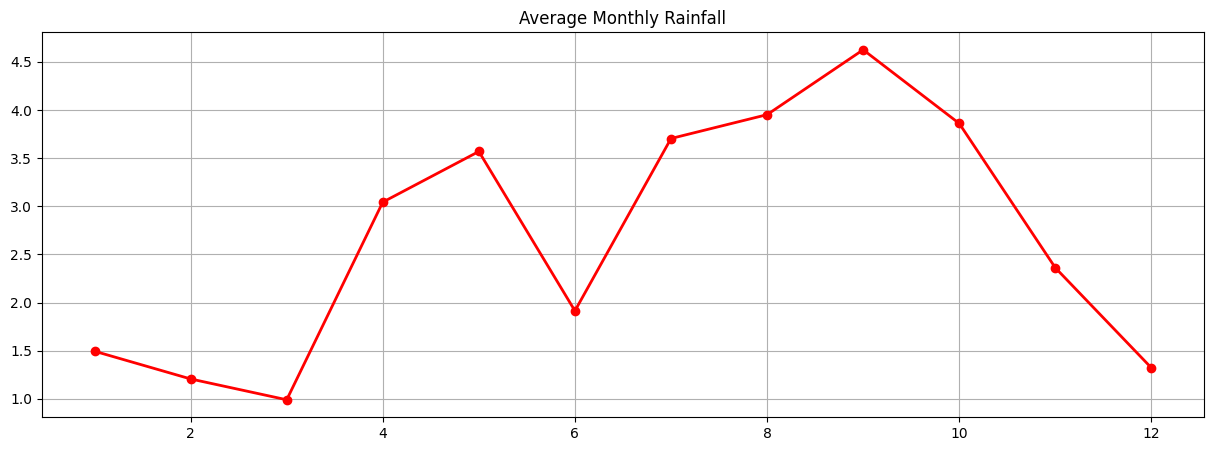

In [32]:
plt.figure(figsize=(15,5))
plt.plot(months.index,months["prcp"],marker="o",color="red",linewidth=2)
plt.title("Average Monthly Rainfall")
plt.grid()
plt.show()

#### Observations
- The Rainfall in Bangalore starts rising from the month of march and it increases till the month of May.
- We can also see a sudden spike of rainfall in the month of September. 

---